In [1]:
#
# Generate data for HBV example based on
# https://github.com/rawlings-group/paresto/blob/master/examples/green_book/hbv_det.m
#

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
kr = [2, 0.025, 1000, 0.25, 1.9985, 7.5E-6]

In [10]:
def rxnrate(t, y, kr):
    dy = np.zeros(3)
    dy[0] = kr[1]*y[1] - kr[3]*y[0]
    dy[1] = kr[0]*y[0] - kr[1]*y[1] - kr[5]*y[1]*y[2]
    dy[2] = kr[2]*y[0] - kr[4]*y[2] - kr[5]*y[1]*y[2]
    return dy

In [11]:
rxnrate_fn = lambda t, y: rxnrate(t, y, kr)

In [22]:
sol = solve_ivp(rxnrate_fn, [0, 100], [1, 0, 0], t_eval = np.linspace(0, 100), method = 'BDF')

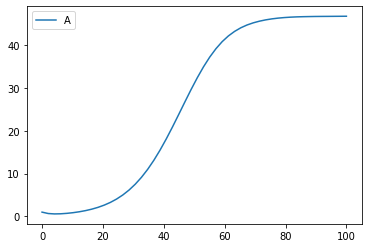

In [23]:
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0, :], label = 'A')
ax.legend()

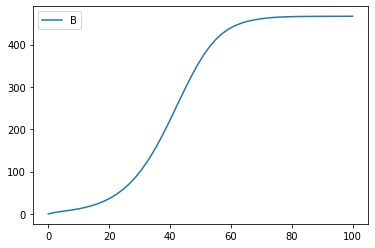

In [24]:
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[1, :], label = 'B')
ax.legend()

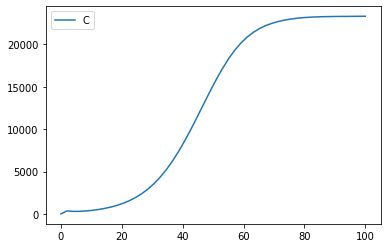

In [25]:
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[2, :], label = 'C')
ax.legend()

In [38]:
# create dataframe
C_data = pd.DataFrame(sol.y.T)
C_data.index = sol.t
C_data.columns = ['A', 'B', 'C']
C_data

,A,B,C
0.000000,1.009830,-0.000680,-0.000513
2.040816,0.661861,3.177605,362.813978
4.081633,0.594968,5.478242,300.565912
6.122449,0.599911,7.446651,307.173358
8.163265,0.714289,9.875031,343.490305
10.204082,0.887860,12.419865,421.723509
12.244898,1.121166,15.528762,520.317113
14.285714,1.369862,19.323184,638.036677
16.326531,1.682558,24.577495,801.507807
18.367347,2.075393,30.656091,995.318340


In [39]:
# add noise
n = C_data.shape[0]
C_data['A'] = C_data['A'] * (1 + np.random.normal(0, 0.1, n))
C_data['B'] = C_data['B'] * (1 + np.random.normal(0, 0.1, n))
C_data['C'] = C_data['C'] * (1 + np.random.normal(0, 0.1, n))

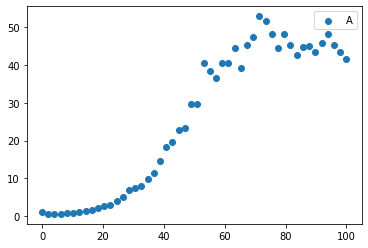

In [40]:
fig, ax = plt.subplots()
ax.scatter(C_data.index, C_data['A'], label = 'A')
ax.legend()

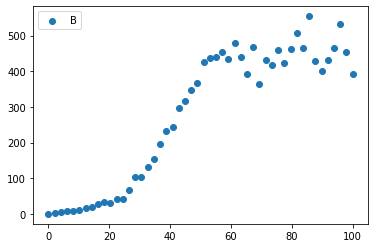

In [41]:
fig, ax = plt.subplots()
ax.scatter(C_data.index, C_data['B'], label = 'B')
ax.legend()

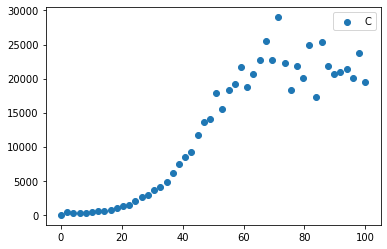

In [42]:
fig, ax = plt.subplots()
ax.scatter(C_data.index, C_data['C'], label = 'C')
ax.legend()

In [44]:
C_data.to_csv('data_sets/hbv_data.csv')